In [1]:
# !pip install matplotlib
# !pip install langdetect
# !pip install iso-639

In [2]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
from iso639 import languages
from langdetect import detect

In [3]:
df = pd.read_csv('data/TMDB_tv_dataset_v3.csv')

In [4]:
df.sample(20)

,id,name,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,overview,adult,backdrop_path,...,tagline,genres,created_by,languages,networks,origin_country,spoken_languages,production_companies,production_countries,episode_run_time
138740,53256,O hartopehtis,0,0,en,0,0.000,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
135273,123278,Perfect Report,1,10,ja,0,0.000,NaN,False,/zhgVp5o1ZkQl3NZ6IrrgPypjgXn.jpg,...,NaN,Drama,NaN,NaN,Fuji TV,JP,NaN,Kyodo Television,NaN,0
56175,72413,Love Ka Hai Intezaar,1,1,hi,1,5.000,Actress Kamini Mathur is an ordinary girl at h...,False,/e3mHXIUMBNf8fKOU8ejhad6xMKw.jpg,...,NaN,"Drama, Family",NaN,"ur, ar, hi","StarPlus, MBC Bollywood",IN,"اردو, العربية, हिन्दी",Alchemy Productions,India,22
3206,1449,Mutant X,3,66,en,91,6.571,Mutant X is a science fiction television serie...,False,/A2BqbbSs9E4emekdxdvWzLK6lpx.jpg,...,Creation can have it's side effects,"Sci-Fi & Fantasy, Action & Adventure, Mystery",NaN,en,Syndication,"CA, US",English,NaN,"Canada, United States of America",44
114732,109276,做个好心人,1,1,zh,0,0.000,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,MY,NaN,NaN,Malaysia,0
79336,234202,Never Ever,1,0,de,0,0.000,NaN,False,NaN,...,NaN,Comedy,NaN,de,Prime Video,DE,Deutsch,bildundtonfabrik,Germany,0
99668,74924,Skandinavien: Der Ruf der Natur,1,5,de,0,0.000,NaN,False,NaN,...,NaN,Documentary,NaN,de,Arte,FI,Deutsch,NaN,NaN,43
7595,71492,Loaded,1,8,en,21,6.900,Four friends who become multi-millionaires whe...,False,/vMz9MGWnF2F5gcyRINvKQjBcWUz.jpg,...,NaN,"Drama, Comedy",NaN,en,Channel 4,GB,English,NaN,NaN,42
39793,66198,Bible Mysteries,1,9,en,1,7.500,A series of programmes exploring great figures...,False,/kLudairTkq3Pf9rF4cuP0sEdq3s.jpg,...,NaN,Documentary,NaN,en,BBC Two,GB,English,"Discovery Channel, BBC Manchester",NaN,50
55236,218368,La extraña dama,1,120,es,1,2.000,NaN,False,/oBbITUpjBXGapaab6TXuH3KzeOZ.jpg,...,NaN,Drama,"María Teresa Forero, Diana Álvarez, Omar Romay",es,El Nueve,AR,Español,NaN,Argentina,50


# Nantalanitás és az értékek átalakitása

In [5]:
dummy_columns=[]

In [6]:
def dummy_creator(df, col ,dummy_columns):
    ps_dummies = pd.get_dummies(df[col], prefix = 'Type', drop_first = False)
    df = df.merge(ps_dummies, left_index = True, right_index = True, how = 'left')
    dummy_columns.append(ps_dummies.columns)
    df=df.drop(col, axis=1)

    return df, dummy_columns

In [7]:
df.isna().sum()

id                           0
name                         5
number_of_seasons            0
number_of_episodes           0
original_language            0
vote_count                   0
vote_average                 0
overview                 73323
adult                        0
backdrop_path            88798
first_air_date           31347
last_air_date            29498
homepage                115110
in_production                0
original_name                5
popularity                   0
poster_path              58786
type                         0
status                       0
tagline                 160262
genres                   67208
created_by              129558
languages                57051
networks                 69048
origin_country           31023
spoken_languages         57798
production_companies    107039
production_countries     89170
episode_run_time             0
dtype: int64

## id

## name

In [8]:
df=df.dropna(subset='name')

In [9]:
df.isna().sum()

id                           0
name                         0
number_of_seasons            0
number_of_episodes           0
original_language            0
vote_count                   0
vote_average                 0
overview                 73318
adult                        0
backdrop_path            88793
first_air_date           31345
last_air_date            29497
homepage                115105
in_production                0
original_name                0
popularity                   0
poster_path              58781
type                         0
status                       0
tagline                 160257
genres                   67203
created_by              129553
languages                57046
networks                 69043
origin_country           31018
spoken_languages         57793
production_companies    107034
production_countries     89165
episode_run_time             0
dtype: int64

## number_of_seasons

## number_of_episodes

## original_language

In [10]:
df['original_language'].value_counts() 

original_language
en    75644
ja    13850
zh    13545
ko     7725
de     7454
      ...  
za        1
mn        1
ti        1
sw        1
aa        1
Name: count, Length: 106, dtype: int64

In [11]:
def get_language_name(language_code):
    try:
        return languages.get(part1=language_code).name
    except (KeyError, AttributeError):
        return "Unknown"  # Vagy tetszőleges érték, amit szeretnél az ismeretlen nyelv esetén

In [12]:
df['OG_language'] = df['original_language'].apply(lambda x: get_language_name(x))

In [13]:
len(df[df['OG_language']=='Unknown'])

1922

In [14]:
df=df.drop('original_language', axis=1)

## vote_count

## vote_average

## overview

## adult

In [15]:
df['adult'] = df['adult'].astype(int)

## backdrop_path

In [16]:
df['backdrop_path']

0          /2OMB0ynKlyIenMJWI2Dy9IWT4c.jpg
1         /gFZriCkpJYsApPZEF3jhxL4yLzG.jpg
2         /2MaumbgBlW1NoPo3ZJO38A6v7OS.jpg
3         /x4salpjB11umlUOltfNvSSrjSXm.jpg
4         /aDBRtunw49UF4XmqfyNuD9nlYIu.jpg
                        ...               
165555                                 NaN
165556                                 NaN
165557                                 NaN
165558                                 NaN
165559                                 NaN
Name: backdrop_path, Length: 165555, dtype: object

In [17]:
df=df.drop('backdrop_path', axis=1)

## first_air_date

In [18]:
df['first_air_date'] = pd.to_datetime(df['first_air_date'], errors='coerce')

In [19]:
df['first_air_date'].min()

Timestamp('1917-01-09 00:00:00')

In [20]:
def_date = pd.to_datetime('1888-10-14')

df['first_air_date'].fillna(def_date, inplace=True)

<Axes: >

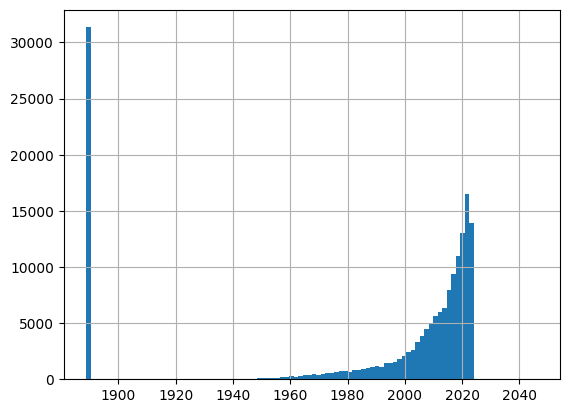

In [21]:
df['first_air_date'].hist(bins=100)

## last_air_date

In [22]:
df['last_air_date'] = pd.to_datetime(df['last_air_date'], errors='coerce')

In [23]:
df['last_air_date'].min()

Timestamp('1917-01-09 00:00:00')

In [24]:
def_date = pd.to_datetime('1888-10-14')

df['last_air_date'].fillna(def_date, inplace=True)

<Axes: >

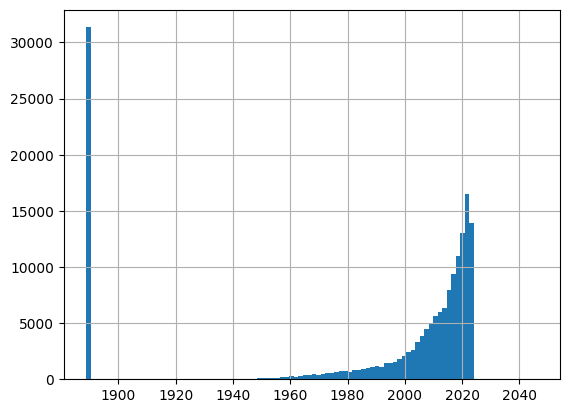

In [25]:
df['first_air_date'].hist(bins=100)

## homepage

In [26]:
df['has_homepage'] = df['homepage'].apply(lambda x: 0 if pd.isna(x) else 1)

In [27]:
df=df.drop('homepage', axis=1)

## in_production

In [28]:
df['in_production'] = df['in_production'].astype(int)

## original_name

## popularity

<Axes: >

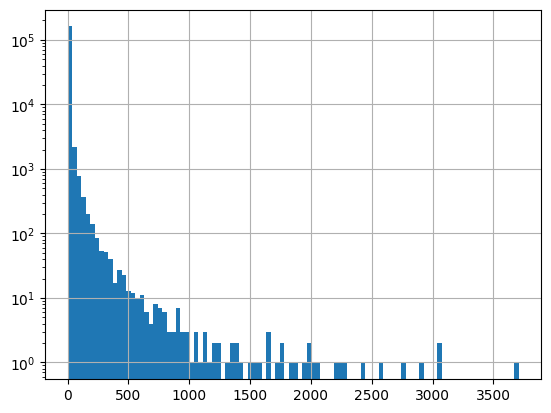

In [29]:
df['popularity'].hist(bins=100, log=True)

## poster_path

In [30]:
df=df.drop('poster_path', axis=1)

## type

In [31]:
df['type'].value_counts()

type
Scripted       127041
Documentary     13452
Miniseries      10639
Reality          9511
Talk Show        2947
Video            1361
News              604
Name: count, dtype: int64

In [32]:
df, dummy_columns=dummy_creator(df, 'type', dummy_columns)

In [68]:
df.sample(10)

,id,name,number_of_seasons,number_of_episodes,vote_count,vote_average,adult,first_air_date,last_air_date,in_production,...,episode_run_time,OG_language,overview_flag,has_homepage,Type_Miniseries,Type_News,Type_Reality,Type_Scripted,Type_Talk Show,Type_Video
55994,226218,Shaka iLembe,1,12,1,10.0,0,2023-06-18,2023-08-20,1,...,0,Zulu,1,1,False,False,False,True,False,False
147905,36804,Dear Woman,1,9,0,0.0,0,1996-10-13,1996-12-08,0,...,60,Japanese,0,0,False,False,False,True,False,False
70589,213874,Shin Onna Kenji Kasumi Yuko,1,20,0,0.0,0,1994-05-03,2003-01-14,1,...,0,Japanese,1,0,False,False,False,True,False,False
22112,35772,Tree of Heaven,1,10,3,5.7,0,2006-02-08,2006-03-16,0,...,60,Korean,1,1,False,False,False,True,False,False
52883,120145,LOU !,1,52,1,0.0,0,2009-04-05,2009-12-27,1,...,12,French,0,0,False,False,False,True,False,False
90466,131661,Amish: Out of Order,1,10,0,0.0,0,2012-04-17,2012-06-19,0,...,0,English,1,0,False,False,False,False,False,False
110421,137308,Chinapidia,1,1,0,0.0,0,2020-07-26,2020-07-26,1,...,60,Korean,0,0,False,False,False,True,False,False
41997,129601,The Cheap Seats,3,71,1,9.0,0,2021-07-20,2023-10-03,1,...,0,English,1,1,False,False,False,True,False,False
145921,134708,Railway Wind and Cloud,1,34,0,0.0,0,2021-09-16,2021-09-24,0,...,45,Chinese,0,0,False,False,False,True,False,False
37378,218874,Krümelmonsters Foodie Truck mit Steffen Henssler,1,13,1,7.0,0,2023-01-22,2023-04-16,1,...,0,German,0,0,False,False,False,True,False,False


## status

In [73]:
df['status'].value_counts()

status
Ended               92507
Returning Series    65435
Canceled             4562
In Production        2229
Planned               595
Pilot                 232
Name: count, dtype: int64

In [33]:
df, dummy_columns=dummy_creator(df, 'status', dummy_columns)

## tagline

In [34]:
df=df.drop('tagline', axis=1)

## genres

In [36]:
print(df['genres'].value_counts())

genres
Documentary                                                                    17274
Drama                                                                          15953
Comedy                                                                         10200
Reality                                                                         7857
Animation                                                                       3296
                                                                               ...  
Animation, Action & Adventure, Drama, Comedy                                       1
Sci-Fi & Fantasy, Comedy, Reality, Action & Adventure                              1
Drama, Animation, Comedy, Action & Adventure                                       1
Animation, Action & Adventure, Comedy, Action & Adventure, Sci-Fi & Fantasy        1
Comedy, Documentary, Sci-Fi & Fantasy, Mystery                                     1
Name: count, Length: 2218, dtype: int64


## created_by

## languages

## networks

## origin_country

## spoken_languages

## production_companies

## production_countries

## episode_run_time 